<a href="https://colab.research.google.com/github/dongcheol-noh/dongcheol-noh.github.io/blob/master/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
import numpy as np
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

넘파이를 이용해서 배열을 나타내어 봤습니다
넘파이는 배열을 행과 열을 맞추어서 정렬해줍니다

In [6]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


입력한 데이터를 출력해봤더니 행과 열을 맞추어서 출력이 되는 모습입니다

In [9]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


넘파이를 이용해서 쉽게 5개의 1을 만들었습니다. 넘파이를 사용하면 간단하게 
타겟 데이터를 만들어 줄 수 있습니다

In [13]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


넘파이를 이용해서 타겟데이터를 만들어 주었습니다. concatenate를 이용해 행과 열로 표시하지 않고 쭉 배열해 주었습니다

In [15]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


사이킷 런을 통해서 훈련데이터와 테스트데이터를 섞어주었습니다

In [17]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [19]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [22]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify =fish_target, random_state=42)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


테스트 타겟에 빙어가 너무 적은 문제점이 있어서 빙어의 stratify를 이용해서 빙어의 수를 늘려 주었습니다

In [24]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

k-최근접이웃분률를 이용해보았더니 정확도가 100%가 나왔습니다

In [26]:
print(kn.predict([[25,150]]))

[0.]


25,150의 데이터를 가진 생선한마리가 빙어로 분류되는 문제점이 생겼습니다

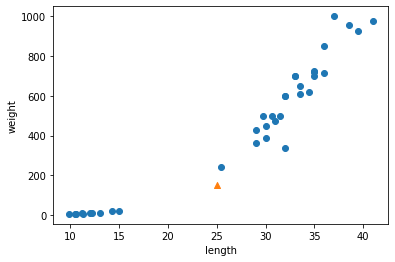

In [29]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

산점도를 그려보았더니 이 생선은 도미쪽에 더 가까이 있어보이지만 빙어로 분류되었습니다

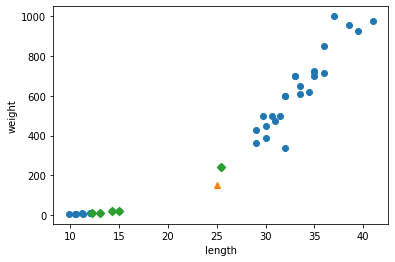

In [32]:
distances, indexes = kn.kneighbors([[25,150]])
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

k- 최근접이웃분류는 가장 가까운 5개의 데이터를 이용해서 분류를 합니다
미지의 생선이 어떤 데이터와 가까운지 표시를 해보았더니 도미 데이터1개 빙어데이터 1개와 가장 가깝다고 표시되었습니다

In [34]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [36]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


가로축의 단위가 세로축의 단위보다 현저하게 작아 거리를 산정할 때 크게 반영이 되지 않아서 결과가 이렇게 나왔다는 사실을 알게되었습니다

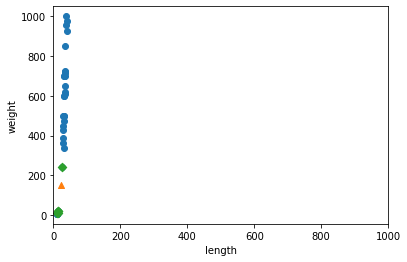

In [38]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(23, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker = 'D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

가로축의 단위를 변경해주었더니 데이터가 거의 한줄로 있는 모습입니다

In [40]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


이러한 문제점을 해결하기위해 표준편차를 이용하기로 했습니다

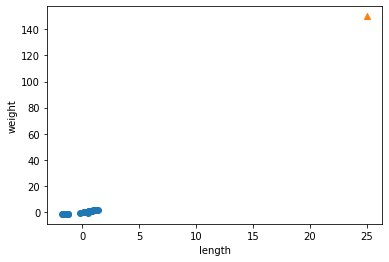

In [42]:
train_scaled = (train_input - mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

표준편차로 산점도를 다시 그려주고 미지의 생선데이터를 산점도에 나타내었더니 미지의 생선데이터만 멀리 떨어져있는 모습입니다 미지의 생선도 평균을 빼주고 분산으로 나누어 주는 과정을 동일하게 진행해야 한다는 것을 알게되었습니다

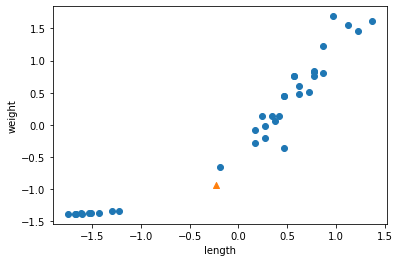

In [46]:
new = ([25, 150] -mean)/ std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

가로축과 세로축이 모두 동일한 거리이고 미지의 생선데이터도 산점도에 잘 나타내어졌습니다

In [48]:
  kn.fit(train_scaled, train_target)
  test_scaled = (test_input - mean)/ std
  kn.score(test_scaled, test_target)

1.0

표준점수를 이용해서 다시 k-최근접이웃모델을 훈련시켰고 정확도가 100%가 나온 모습입니다.

In [50]:
print(kn.predict([new]))

[1.]


미지의 생선데이터도 도미로 판정되었습니다

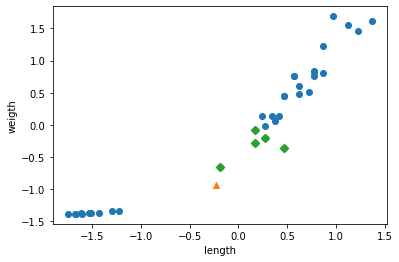

In [52]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

k-최근접모델에서 미지의 생선데이터가 어떤 데이터들을 이웃한 데이터로 판단했는지 산점도에 나타내 보았더니 이웃한 데이터는 모두 도미데이터였습니다.
